In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Module scripts
from toss import compute_trajectory
from toss import compute_motion, setup_spin_axis, rotate_point
from toss import get_trajectory_fixed_step
from toss import FitnessFunctions
from toss import get_fitness
from toss import create_mesh
from toss import setup_parameters
from toss import plot_UDP_3D, plot_UDP_2D, fitness_over_generations, fitness_over_time, distance_deviation_over_time
from toss import compute_space_coverage, create_spherical_tensor_grid

# Core packages
from dotmap import DotMap
import numpy as np
from math import pi

# For Plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv
from toss.visualization.plotting_utility import plot_performance_scaling


Using numpy backend
/home/rasmus/mambaforge/envs/toss/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
folder = 'Results/GACO_parameter_analysis/new_but_with_same_seed_three_times/'

ValueError: x and y must have same first dimension, but have shapes (50,) and (500,)

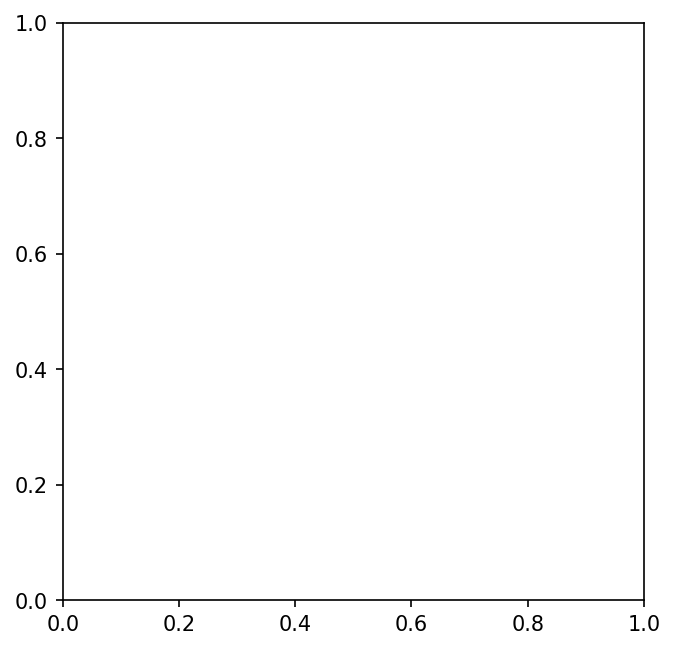

In [7]:
ker_cases = [10, 30, 50, 100, 150, 200]

l1 = np.transpose(np.genfromtxt(folder+'ker_tests_f_list_0.csv', delimiter=','))
l2 = np.transpose(np.genfromtxt(folder+'ker_tests_f_list_1.csv', delimiter=','))
l3 = np.transpose(np.genfromtxt(folder+'ker_tests_f_list_2.csv', delimiter=','))
#l1 = np.hstack((np.zeros((l1.shape[0],1)), l1))
#l2 = np.hstack((np.zeros((l1.shape[0],1)), l2))
#l3 = np.hstack((np.zeros((l1.shape[0],1)), l3))

k0 = np.vstack((l1[0,:], l2[0,:], l3[0,:]))
k1 = np.vstack((l1[1,:], l2[1,:], l3[1,:]))
k2 = np.vstack((l1[2,:], l2[2,:], l3[2,:]))
k3 = np.vstack((l1[3,:], l2[3,:], l3[3,:]))
k4 = np.vstack((l1[4,:], l2[4,:], l3[4,:]))
k5 = np.vstack((l1[5,:], l2[5,:], l3[5,:]))

avg0 = np.mean(k0, axis=0)
avg1 = np.mean(k1, axis=0)
avg2 = np.mean(k2, axis=0)
avg3 = np.mean(k3, axis=0)
avg4 = np.mean(k4, axis=0)
avg5 = np.mean(k5, axis=0)
avg = np.vstack((avg0,avg1,avg2,avg3,avg4,avg5))

min0 = np.min(k0, axis=0)
min1 = np.min(k1, axis=0)
min2 = np.min(k2, axis=0)
min3 = np.min(k3, axis=0)
min4 = np.min(k4, axis=0)
min5 = np.min(k5, axis=0)
minl = np.vstack((min0,min1,min2,min3,min4,min5))


gen = np.arange(0,500,1)

fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(ker_cases):
    lab = str(val)
    ax1.plot(gen, avg[i,:], label='Ker: ' + lab)
ax1.grid('major')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xlabel('Generations', fontsize=16, labelpad=10)
ax1.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax1.legend(loc='upper right', fontsize=10)
plt.tight_layout()


fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(ker_cases):
    lab = str(val)
    ax2.plot(gen, minl[i,:], label='Ker: ' + lab)
ax2.grid('major')
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xlabel('Generations', fontsize=16, labelpad=10)
ax2.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax2.legend(loc='upper right', fontsize=10)
plt.tight_layout()


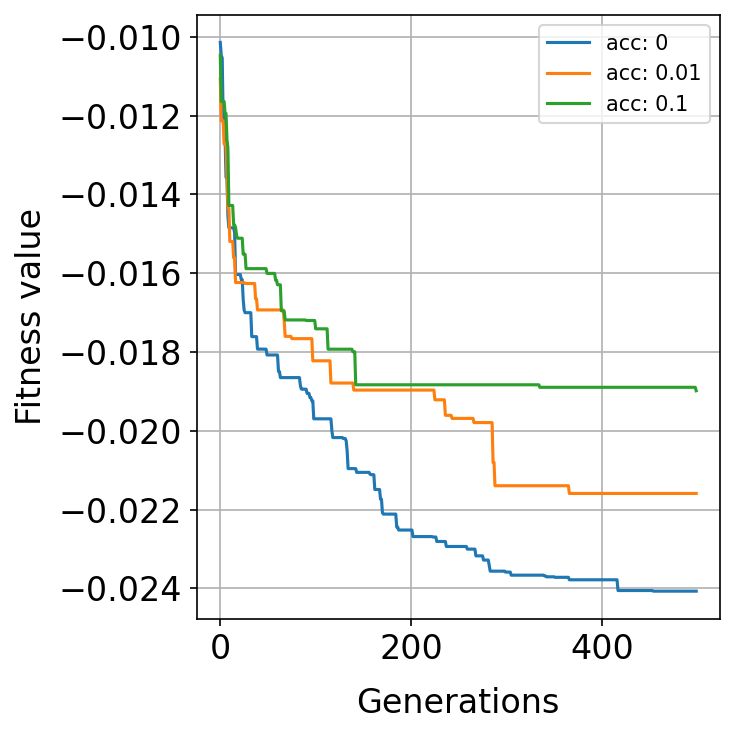

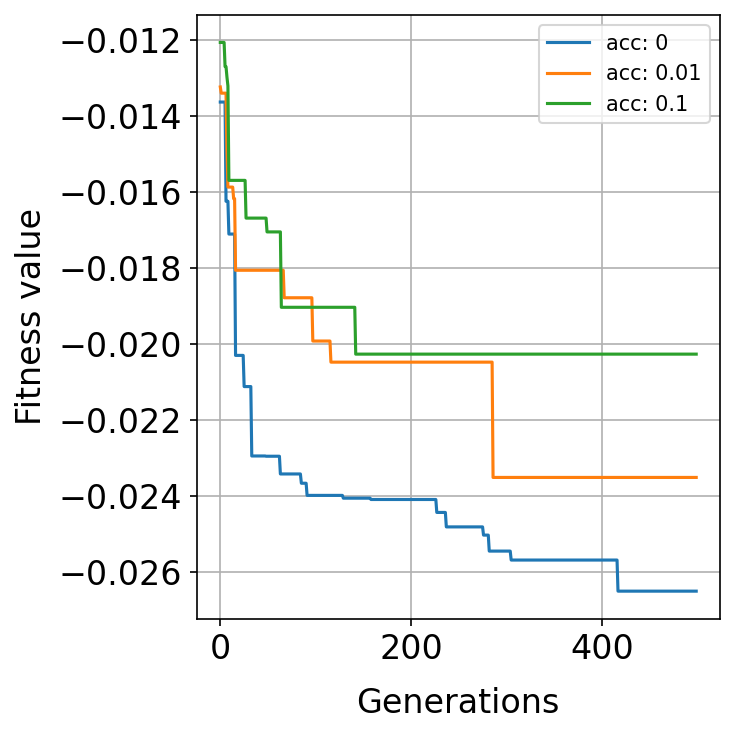

In [5]:
acc_cases = [0, 0.01, 0.1]

l1 = np.transpose(np.genfromtxt('acc_list_f_list_0.csv', delimiter=','))
l2 = np.transpose(np.genfromtxt('acc_list_f_list_1.csv', delimiter=','))
l3 = np.transpose(np.genfromtxt('acc_list_f_list_2.csv', delimiter=','))
#l1 = np.hstack((np.zeros((l1.shape[0],1)), l1))
#l2 = np.hstack((np.zeros((l1.shape[0],1)), l2))
#l3 = np.hstack((np.zeros((l1.shape[0],1)), l3))

k0 = np.vstack((l1[0,:], l2[0,:], l3[0,:]))
k1 = np.vstack((l1[1,:], l2[1,:], l3[1,:]))
k2 = np.vstack((l1[2,:], l2[2,:], l3[2,:]))

avg0 = np.mean(k0, axis=0)
avg1 = np.mean(k1, axis=0)
avg2 = np.mean(k2, axis=0)
avg = np.vstack((avg0,avg1,avg2))

min0 = np.min(k0, axis=0)
min1 = np.min(k1, axis=0)
min2 = np.min(k2, axis=0)
minl = np.vstack((min0,min1,min2))


gen = np.arange(0,500,1)
fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(acc_cases):
    lab = str(val)
    ax1.plot(gen, avg[i,:], label='acc: ' + lab)
ax1.grid('major')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xlabel('Generations', fontsize=16, labelpad=10)
ax1.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax1.legend(loc='upper right', fontsize=10)
plt.tight_layout()


fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(acc_cases):
    lab = str(val)
    ax2.plot(gen, minl[i,:], label='acc: ' + lab)
ax2.grid('major')
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xlabel('Generations', fontsize=16, labelpad=10)
ax2.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax2.legend(loc='upper right', fontsize=10)
plt.tight_layout()

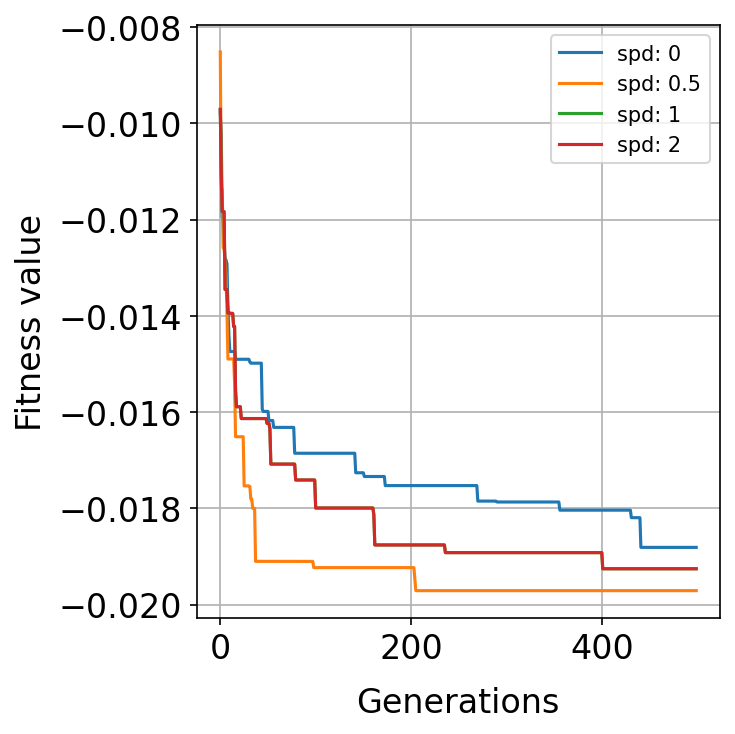

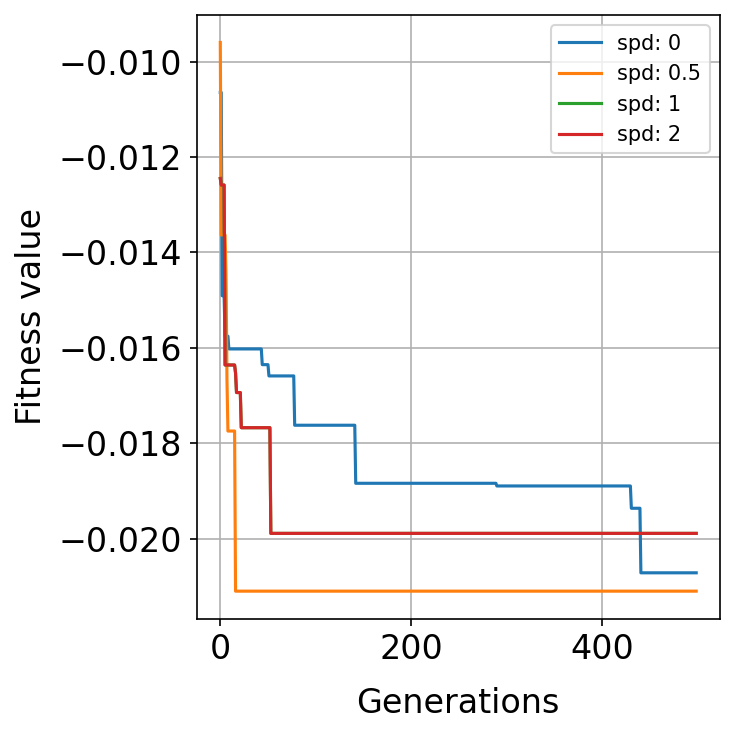

In [8]:
c_speed_cases = [0, 0.5, 1, 2]

l1 = np.transpose(np.genfromtxt('c_speed_list_f_list_0.csv', delimiter=','))
l2 = np.transpose(np.genfromtxt('c_speed_list_f_list_1.csv', delimiter=','))
l3 = np.transpose(np.genfromtxt('c_speed_list_f_list_2.csv', delimiter=','))
#l1 = np.hstack((np.zeros((l1.shape[0],1)), l1))
#l2 = np.hstack((np.zeros((l1.shape[0],1)), l2))
#l3 = np.hstack((np.zeros((l1.shape[0],1)), l3))

k0 = np.vstack((l1[0,:], l2[0,:], l3[0,:]))
k1 = np.vstack((l1[1,:], l2[1,:], l3[1,:]))
k2 = np.vstack((l1[2,:], l2[2,:], l3[2,:]))
k3 = np.vstack((l1[3,:], l2[3,:], l3[3,:]))

avg0 = np.mean(k0, axis=0)
avg1 = np.mean(k1, axis=0)
avg2 = np.mean(k2, axis=0)
avg3 = np.mean(k2, axis=0)
avg = np.vstack((avg0,avg1,avg2,avg3))

min0 = np.min(k0, axis=0)
min1 = np.min(k1, axis=0)
min2 = np.min(k2, axis=0)
min3 = np.min(k2, axis=0)
minl = np.vstack((min0,min1,min2,min3))


gen = np.arange(0,500,1)
fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(c_speed_cases):
    lab = str(val)
    ax1.plot(gen, avg[i,:], label='spd: ' + lab)
ax1.grid('major')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xlabel('Generations', fontsize=16, labelpad=10)
ax1.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax1.legend(loc='upper right', fontsize=10)
plt.tight_layout()


fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(c_speed_cases):
    lab = str(val)
    ax2.plot(gen, minl[i,:], label='spd: ' + lab)
ax2.grid('major')
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xlabel('Generations', fontsize=16, labelpad=10)
ax2.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax2.legend(loc='upper right', fontsize=10)
plt.tight_layout()

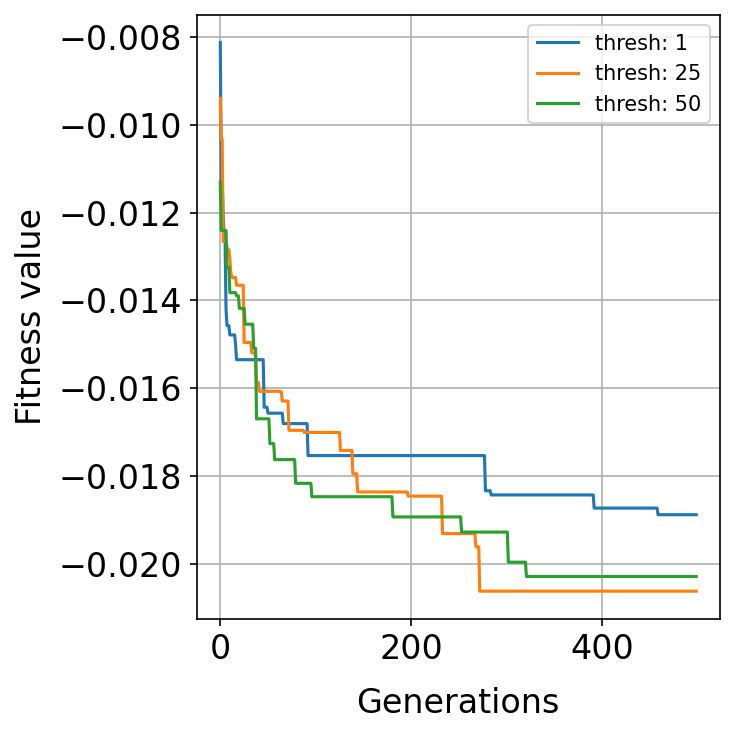

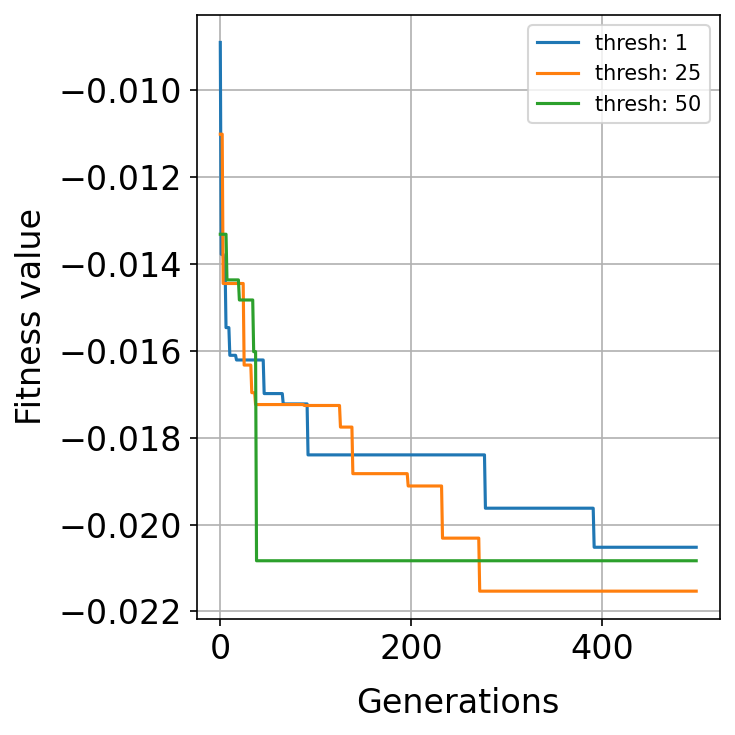

In [9]:
thresh_cases = [1, 25, 50]

l1 = np.transpose(np.genfromtxt('thresh_list_f_list_0.csv', delimiter=','))
l2 = np.transpose(np.genfromtxt('thresh_list_f_list_1.csv', delimiter=','))
l3 = np.transpose(np.genfromtxt('thresh_list_f_list_2.csv', delimiter=','))
#l1 = np.hstack((np.zeros((l1.shape[0],1)), l1))
#l2 = np.hstack((np.zeros((l1.shape[0],1)), l2))
#l3 = np.hstack((np.zeros((l1.shape[0],1)), l3))

k0 = np.vstack((l1[0,:], l2[0,:], l3[0,:]))
k1 = np.vstack((l1[1,:], l2[1,:], l3[1,:]))
k2 = np.vstack((l1[2,:], l2[2,:], l3[2,:]))

avg0 = np.mean(k0, axis=0)
avg1 = np.mean(k1, axis=0)
avg2 = np.mean(k2, axis=0)
avg = np.vstack((avg0,avg1,avg2))

min0 = np.min(k0, axis=0)
min1 = np.min(k1, axis=0)
min2 = np.min(k2, axis=0)
minl = np.vstack((min0,min1,min2))


gen = np.arange(0,500,1)
fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(thresh_cases):
    lab = str(val)
    ax1.plot(gen, avg[i,:], label='thresh: ' + lab)
ax1.grid('major')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xlabel('Generations', fontsize=16, labelpad=10)
ax1.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax1.legend(loc='upper right', fontsize=10)
plt.tight_layout()


fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(thresh_cases):
    lab = str(val)
    ax2.plot(gen, minl[i,:], label='thresh: ' + lab)
ax2.grid('major')
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xlabel('Generations', fontsize=16, labelpad=10)
ax2.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax2.legend(loc='upper right', fontsize=10)
plt.tight_layout()

(3, 500)
(3, 500)


IndexError: index 5 is out of bounds for axis 0 with size 5

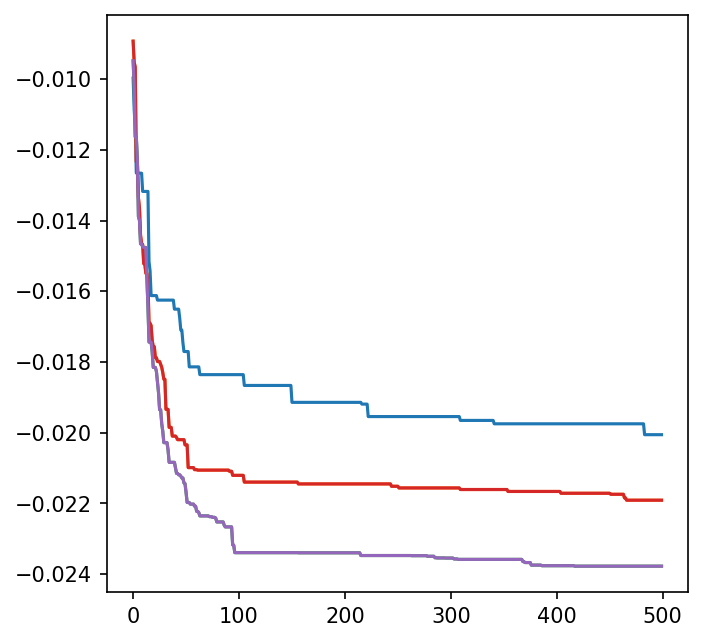

In [21]:

thresh_cases = [1, 25, 50, 100, 250, 500]

l1 = np.transpose(np.genfromtxt('Nmark_list_f_list_0.csv', delimiter=','))
l2 = np.transpose(np.genfromtxt('Nmark_list_f_list_1.csv', delimiter=','))
l3 = np.transpose(np.genfromtxt('Nmark_list_f_list_2.csv', delimiter=','))
l4 = np.transpose(np.genfromtxt('new_thresh_list_f_list_0.csv', delimiter=','))
l5 = np.transpose(np.genfromtxt('new_thresh_list_f_list_1.csv', delimiter=','))
l6 = np.transpose(np.genfromtxt('new_thresh_list_f_list_2.csv', delimiter=','))


l1 = np.vstack((l1,l4))
l2 = np.vstack((l2,l5))
l3 = np.vstack((l3,l6))


#l1 = np.hstack((np.zeros((l1.shape[0],1)), l1))
#l2 = np.hstack((np.zeros((l1.shape[0],1)), l2))
#l3 = np.hstack((np.zeros((l1.shape[0],1)), l3))

k0 = np.vstack((l1[0,:], l2[0,:], l3[0,:]))
k1 = np.vstack((l1[1,:], l2[1,:], l3[1,:]))
k2 = np.vstack((l1[2,:], l2[2,:], l3[2,:]))
k3 = np.vstack((l1[3,:], l2[3,:], l3[3,:]))
k4 = np.vstack((l1[4,:], l2[4,:], l3[4,:]))
k5 = np.vstack((l1[5,:], l2[5,:], l3[5,:]))

avg0 = np.mean(k0, axis=0)
avg1 = np.mean(k1, axis=0)
avg2 = np.mean(k2, axis=0)
avg3 = np.mean(k3, axis=0)
avg4 = np.mean(k4, axis=0)
avg5 = np.mean(k5, axis=0)
avg = np.vstack((avg0,avg1,avg2,avg3,avg4,avg5))

min0 = np.min(k0, axis=0)
min1 = np.min(k1, axis=0)
min2 = np.min(k2, axis=0)
min3 = np.min(k3, axis=0)
min4 = np.min(k4, axis=0)
min5 = np.min(k5, axis=0)
minl = np.vstack((min0,min1,min2,min3,min4,min5))



gen = np.arange(0,500,1)
fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(thresh_cases):
    lab = str(val)
    ax1.plot(gen, avg[i,:], label='thresh: ' + lab)
    #if

ax1.grid('major')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xlabel('Generations', fontsize=16, labelpad=10)
ax1.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax1.legend(loc='upper right', fontsize=10)
plt.tight_layout()


fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(thresh_cases):
    lab = str(val)
    ax2.plot(gen, minl[i,:], label='thresh: ' + lab)
ax2.grid('major')
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xlabel('Generations', fontsize=16, labelpad=10)
ax2.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax2.legend(loc='upper right', fontsize=10)
plt.tight_layout()

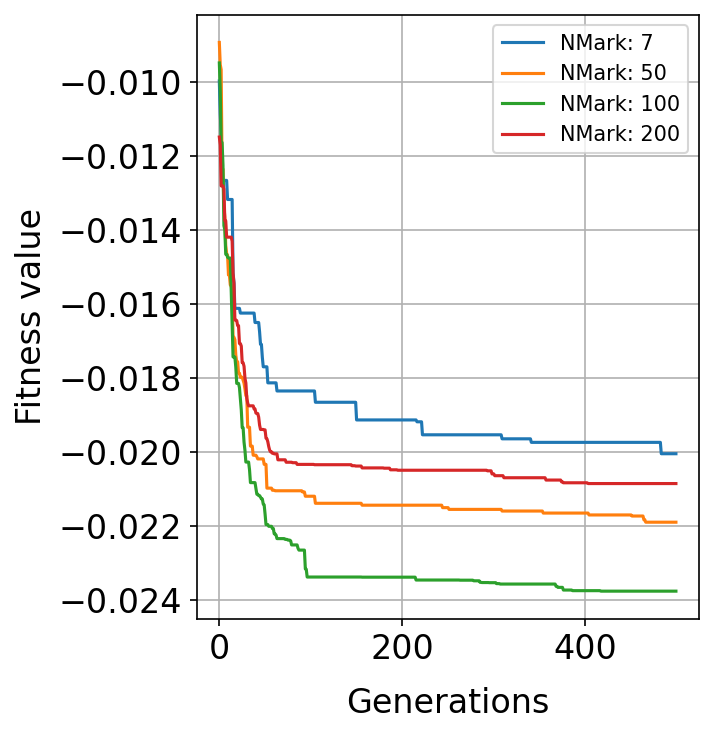

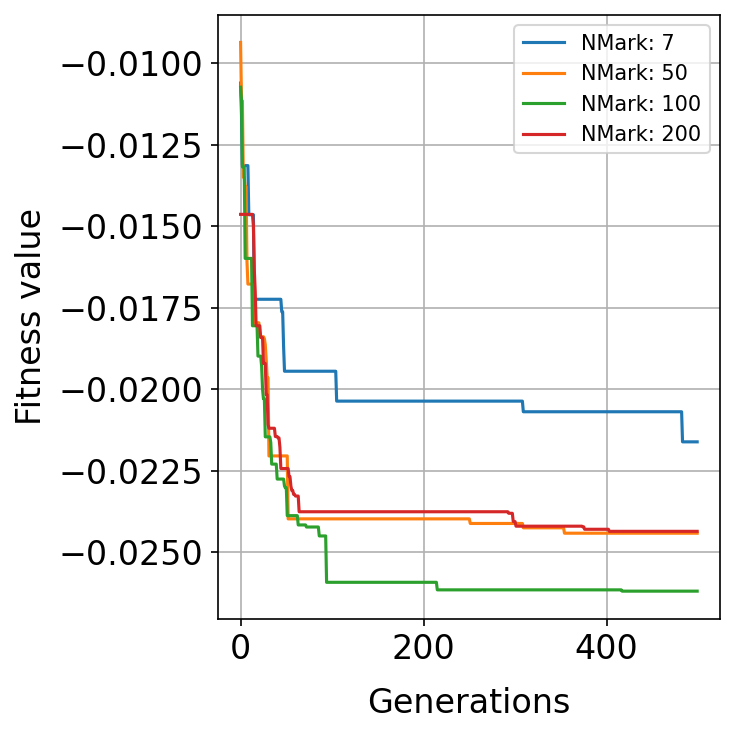

In [10]:

Nmark_cases = [7, 50, 100, 200]

l1 = np.transpose(np.genfromtxt('Nmark_list_f_list_0.csv', delimiter=','))
l2 = np.transpose(np.genfromtxt('Nmark_list_f_list_1.csv', delimiter=','))
l3 = np.transpose(np.genfromtxt('Nmark_list_f_list_2.csv', delimiter=','))
#l1 = np.hstack((np.zeros((l1.shape[0],1)), l1))
#l2 = np.hstack((np.zeros((l1.shape[0],1)), l2))
#l3 = np.hstack((np.zeros((l1.shape[0],1)), l3))

k0 = np.vstack((l1[0,:], l2[0,:], l3[0,:]))
k1 = np.vstack((l1[1,:], l2[1,:], l3[1,:]))
k2 = np.vstack((l1[2,:], l2[2,:], l3[2,:]))
k3 = np.vstack((l1[3,:], l2[3,:], l3[3,:]))

avg0 = np.mean(k0, axis=0)
avg1 = np.mean(k1, axis=0)
avg2 = np.mean(k2, axis=0)
avg3 = np.mean(k3, axis=0)
avg = np.vstack((avg0,avg1,avg2,avg3))

min0 = np.min(k0, axis=0)
min1 = np.min(k1, axis=0)
min2 = np.min(k2, axis=0)
min3 = np.min(k3, axis=0)
minl = np.vstack((min0,min1,min2,min3))


gen = np.arange(0,500,1)
fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(Nmark_cases):
    lab = str(val)
    ax1.plot(gen, avg[i,:], label='NMark: ' + lab)
ax1.grid('major')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xlabel('Generations', fontsize=16, labelpad=10)
ax1.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax1.legend(loc='upper right', fontsize=10)
plt.tight_layout()


fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=150)
for i, val in enumerate(Nmark_cases):
    lab = str(val)
    ax2.plot(gen, minl[i,:], label='NMark: ' + lab)
ax2.grid('major')
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xlabel('Generations', fontsize=16, labelpad=10)
ax2.set_ylabel('Fitness value', fontsize=16, labelpad=5)
ax2.legend(loc='upper right', fontsize=10)
plt.tight_layout()
